<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Hospital Financial Performance Analysis with SQL 
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>


<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Introduction</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
This is a demonstration of Vantage capabilities for functional demos e.g.
    <li style = 'font-size:16px;font-family:Arial;color:#00233C'> Data Cleansing Functions - like  TD_SimpleImputeFit </li>
        <li style = 'font-size:16px;font-family:Arial;color:#00233C'> Data Exploration Functions - like  TD_ColumnSummary, TD_UnivariateStatistics </li>
    <li style = 'font-size:16px;font-family:Arial;color:#00233C'> Feature Engineering Functions - like TD_Histogram, TD_OutlierFilterFit, TD_ScaleFit  and TD_ColumnTransformer </li>
</p>
<br>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
In a typical Data Science project there are multiple pre-processing steps involved to process the raw incoming data before it can actually be used in a model for predictions. On an estimate about 70-80% of the time and effort goes into the pre-processing steps. With the help of Vantage's in Db functions we can perform these functions very effectively and at scale.
In this demo notebook we are exploring sample data set of hospital financial report from CMS using Teradata ClearScape Analytics, we will go through the general pre-processing steps that are involved in getting the source data and making the data useable for model creation.
</p>  

In [59]:
%connect local

Password: ········


Success: 'hcademo' connection established and activated for user 'demo_user'


<p style = 'font-size:16px;font-family:Arial;color:#00233C'> <b> 1 Checking data demographics  </b> </p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b><a href = 'https://docs.teradata.com/r/Enterprise_IntelliFlex_VMware/Database-Analytic-Functions/Data-Exploration-Functions/TD_ColumnSummary'>TD_ColumnSummary</a> </b>function  displays Column name, datatype and other demographics like count of NULLs etc for each specified input table column</p>

In [61]:
select top 5* from Hospital_Revenue_Factors

,Hospital_Name,State_Code,County,City,Total_Income,Net_Income,Net_Income_from_Service_to_Patients,Total_Other_Income,Total_Other_Expenses,Wage_Related_Costs_RHC_FQHC,Notes_Receivable,Cost_To_Charge_Ratio,Net_Revenue_from_Medicaid,Medicaid_Charges,Net_Revenue_from_Stand_Alone_CHIP,Stand_Alone_CHIP_Charges,Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable,Hospital_Total_Days_Title_V_For_Adults_Peds,Unsecured_Loans,Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts,Outpatient_Total_Charges
1,WALTHALL COUNTY GENERAL HOSPITAL,MS,WALTHALL,TYLERTOWN,-168625.00,-168625.00,-718736.00,550111.00,,,,.460501,2107486.00,4038371.00,14205.00,64402.00,-4912346.00,,,15099047.00,22152391.00
2,LANDMARK REHABILITATION HOSPITAL OF,MO,BOONE,COLUMBIA,-398428.00,-398428.00,-399124.00,696.00,,,,,,,,,,,,1771846.00,
3,CHOCTAW REGIONAL MEDICAL CENTER,MS,CHOCTAW,ACKERMAN,1721843.00,1721843.00,-2567462.00,4289305.00,,,,.677769,1082632.00,2220491.00,69508.00,111048.00,-3544140.00,,,13987435.00,20346269.00
4,TJ HEALTH COLUMBIA,KY,ADAIR,COLUMBIA,4451624.00,4451624.00,600906.00,3850718.00,,825604.00,,.405463,7151443.00,21193549.00,,,-4517162.00,,,30193907.00,41052238.00
5,MURRAY CALLOWAY COUNTY HOSPITAL,KY,CALLOWAY,MURRAY,208325.00,208325.00,183412.00,24913.00,,,1867331.00,.218073,14843024.00,83181227.00,,,-45980039.00,,,363573741.00,325522709.00


In [62]:
SELECT * FROM TD_ColumnSummary (
 ON Hospital_Revenue_Factors AS InputTable
 USING
 TargetColumns ('[:]')
) AS dt;

,ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
1,State_Code,CHAR(2) CHARACTER SET LATIN,6064,0,0,,,,0,100
2,Wage_Related_Costs_RHC_FQHC,"DECIMAL(18,2)",383,5681,,0,383,0,93.68403693931398,6.315963060686016
3,Total_Income,"DECIMAL(18,2)",5973,91,,0,3511,2462,1.5006596306068603,98.49934036939314
4,Hospital_Name,VARCHAR(255) CHARACTER SET LATIN,6064,0,0,,,,0,100
5,County,VARCHAR(100) CHARACTER SET LATIN,5500,564,0,,,,9.300791556728232,90.69920844327177
6,Notes_Receivable,"DECIMAL(18,2)",243,5821,,0,237,6,95.99274406332454,4.007255936675461
7,Total_Other_Income,"DECIMAL(18,2)",5751,313,,0,5475,276,5.161609498680739,94.83839050131927
8,Net_Income_from_Service_to_Patients,"DECIMAL(18,2)",5979,85,,0,2219,3760,1.4017150395778364,98.59828496042216
9,City,VARCHAR(100) CHARACTER SET LATIN,6064,0,0,,,,0,100
10,Cost_To_Charge_Ratio,"DECIMAL(10,6)",4600,1464,,0,4600,0,24.142480211081793,75.85751978891821


<p style = 'font-size:18px;font-family:Arial;color:#00233C'> <b> 2. Check and Impute Missing Values  </b> </p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>TD_SimpleImputeFit </b>will output a table with the values that will be used to substitute the missing values<br>
    *Note one can also use the Fit table as input to <b>TD_ColumnTransformer</b>
    

In [63]:
SELECT columnname, datatype, nullpercentage FROM TD_ColumnSummary (
 ON Hospital_Revenue_Factors AS InputTable
 USING
 TargetColumns ('[:]')
) AS dt
where 
nullpercentage > 0
order by 3 desc;

,ColumnName,Datatype,NullPercentage
1,Hospital_Total_Days_Title_V_For_Adults_Peds,"DECIMAL(18,2)",97.95514511873351
2,Notes_Receivable,"DECIMAL(18,2)",95.99274406332454
3,Unsecured_Loans,"DECIMAL(18,2)",94.9868073878628
4,Wage_Related_Costs_RHC_FQHC,"DECIMAL(18,2)",93.68403693931398
5,Net_Revenue_from_Stand_Alone_CHIP,"DECIMAL(18,2)",83.7401055408971
6,Stand_Alone_CHIP_Charges,"DECIMAL(18,2)",83.41029023746702
7,Total_Other_Expenses,"DECIMAL(18,2)",70.67941952506597
8,Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable,"DECIMAL(18,2)",32.37137203166227
9,Medicaid_Charges,"DECIMAL(18,2)",27.88588390501319
10,Net_Revenue_from_Medicaid,"DECIMAL(18,2)",27.687994722955146


As few columns has more than 50% of null values we can remove these columns

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b><a href = 'https://docs.teradata.com/r/Enterprise_IntelliFlex_VMware/Database-Analytic-Functions/Feature-Engineering-Transform-Functions/Antiselect'>Antiselect</a> </b> returns all columns except those specified in the Exclude syntax element.</p>

Below are the columns with over 50% null values, we will remove them using Antiselect function <br>
Hospital_Total_Days_Title_V_For_Adults_Peds,<br>
Notes_Receivable,<br>
Unsecured_Loans,<br>
Wage_Related_Costs_RHC_FQHC,<br>
Net_Revenue_from_Stand_Alone_CHIP,<br>
Stand_Alone_CHIP_Charges,<br>
Total_Other_Expenses

In [64]:
CREATE volatile table Hospital_Revenue_Factors1 as (
 select * from Antiselect (
on Hospital_Revenue_Factors
USING
Exclude ('Hospital_Total_Days_Title_V_For_Adults_Peds',
            'Notes_Receivable',
            'Unsecured_Loans',
            'Wage_Related_Costs_RHC_FQHC',
            'Net_Revenue_from_Stand_Alone_CHIP',
            'Stand_Alone_CHIP_Charges',
            'Total_Other_Expenses'
           )
            
) as dt
)
WITH DATA
ON COMMIT PRESERVE ROWS;

Success: 0 rows affected

In [65]:
-- fit the SimpleImpute function on categorical columns
CREATE VOLATILE TABLE ImputFitTbl AS(
SELECT * FROM TD_SimpleImputeFit (
    ON Hospital_Revenue_Factors1 AS InputTable
    --OUT VOLATILE TABLE OutputTable(impute_fit_missing_output)
    USING
    ColsForStats ('Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable',
                  'Outpatient_Total_Charges')
    Stats ('median')
  ) AS dt) WITH DATA
ON COMMIT PRESERVE ROWS;

Success: 0 rows affected

In [66]:
select * from ImputFitTbl

,TD_INDEX_SIMFIT,TD_TARGETCOLUMN_SIMFIT,TD_NUM_COLVAL_SIMFIT,TD_STR_COLVAL_SIMFIT,TD_ISNUMERIC_SIMFIT
1,11,Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable,-1.0219125e+07,,1
2,13,Outpatient_Total_Charges,1.42918601e+08,,1


TD_SimpleImputeFit and TD_SimpleImputeTransform/TD_ColumnTransformer works on integer and categorical columns and we can use them for filling the missing column values based on min/max/mean/median of the values in the column

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>3. Outlier Identification</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We can see some extraordinary value outliers in our numeric data based on the statistics gathered above. We can use the <a href='https://docs.teradata.com/search/all?query=TD_HISTOGRAM&content-lang=en-US'>TD_Histogram</a> function to look at the distribution of each data column, which can guide how to remove outliers.</p>
    
<ol style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Inspect the distribution stastics</li>
    <li>Use TD_Histogram to view column distributions using calculated binning</li>
    <li>Use TD_Histogram using MinMax table as input</li>
    </ol>

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>3.1 Gather statistics using TD_UnivariateStatistics</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Univariate analysis is the simplest form of analyzing data. Its significant purpose is to describe; It takes data, summarizes it, and finds patterns in the data.
    <br>
    <a href = 'https://docs.teradata.com/search/all?query=TD_UnivariateStatistics&content-lang=en-US'>TD_UnivariateStatistics</a> displays descriptive statistics for each specified numeric input table column.
</p>

In [67]:
CREATE volatile TABLE AllStats_unpivoted AS (
SELECT *
FROM TD_UnivariateStatistics (
ON Hospital_Revenue_Factors1  AS InputTable
USING
TargetColumns('Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable',
                'Medicaid_Charges',
                'Net_Revenue_from_Medicaid',
                'Cost_To_Charge_Ratio',
                'Outpatient_Total_Charges',
                'Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts',
                'Total_Other_Income',
                'Total_Income',
                'Net_Income',
                'Net_Income_from_Service_to_Patients')
STATS( 
      'MEAN',
      'MEDIAN',
      'MODE',           
      'ZERO VALUES COUNT',
      'PERCENTILES',
      'MINIMUM',
      'MAXIMUM'
        )
        ) as dt) WITH DATA
ON COMMIT PRESERVE ROWS;

Success: 0 rows affected

In [68]:
SELECT * from AllStats_unpivoted

,ATTRIBUTE,StatName,StatValue
1,Net_Income,MINIMUM,-1.224029123e+09
2,Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts,MINIMUM,-6.670292e+06
3,Net_Income_from_Service_to_Patients,MINIMUM,-1.625376e+09
4,Cost_To_Charge_Ratio,MINIMUM,0.041931
5,Net_Income,MAXIMUM,7.919569502e+09
6,Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts,MAXIMUM,3.4204267678e+10
7,Net_Income_from_Service_to_Patients,MAXIMUM,7.86465044e+09
8,Cost_To_Charge_Ratio,MAXIMUM,3636.891704
9,Net_Income,MEAN,7.117900533143623e+06
10,Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts,MEAN,6.820396133618467e+08


In [69]:
--Due to the limitation of data format on sql module, we need to manually make the data format readable, 
CREATE VOLATILE TABLE  AllStats_unpivoted1 AS (
SELECT ATTRIBUTE,
       StatName,
       CAST(StatValue as DECIMAL(18,2)) as StatValue FROM AllStats_unpivoted) WITH DATA
ON COMMIT PRESERVE ROWS;

Success: 0 rows affected

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.3 Pivot for easier analysis</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><a href='https://docs.teradata.com/search/all?query=PIVOT&content-lang=en-US'>PIVOT</a> is a relational operator for transforming rows into columns. The function is helpful for reporting purposes, allowing you to aggregate and rotate data to create easy-to-read tables.</p>


In [70]:
REPLACE VIEW AllStats_pivoted AS
    SELECT *
        FROM AllStats_unpivoted1
        PIVOT (
            MAX(StatValue) FOR  ATTRIBUTE IN (
                'Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable',
                'Medicaid_Charges',
                'Net_Revenue_from_Medicaid',
                'Cost_To_Charge_Ratio',
                'Outpatient_Total_Charges',
                'Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts',
                'Total_Other_Income',
                'Total_Income',
                'Net_Income',
                'Net_Income_from_Service_to_Patients')
        ) tmp;

Success: 12 rows affected

In [71]:
select * from AllStats_pivoted order by 1;

,StatName,'Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable','Medicaid_Charges','Net_Revenue_from_Medicaid','Cost_To_Charge_Ratio','Outpatient_Total_Charges','Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts','Total_Other_Income','Total_Income','Net_Income','Net_Income_from_Service_to_Patients'
1,MAXIMUM,2997982490.00,7968634234.00,3173353585.00,3636.89,22052095387.00,34204267678.00,1794123702.00,7903916479.00,7919569502.00,7864650440.00
2,MEAN,-61300357.08,194253153.77,31727939.08,1.35,466348478.27,682039613.36,22122194.79,9155437.97,7117900.53,-12132348.42
3,MEDIAN,-10219125.00,51660315.00,9163034.00,.29,142918601.00,126810109.00,2970702.00,1004401.00,750973.00,-2037805.00
4,MINIMUM,-5019264385.00,10.00,-14497169.00,.04,21.00,-6670292.00,-296372414.00,-1224029123.00,-1224029123.00,-1625376000.00
5,MODE,-670984347.00,4649134.00,1.00,1.00,255.00,1.00,1.00,-5111626.00,-4883173.00,-15655043.00
6,PERCENTILES(1),-682803631.00,244047.68,37188.04,.07,783.76,255646.95,-30316523.50,-134795532.36,-146386717.45,-389209893.94
7,PERCENTILES(10),-156868664.00,2851717.80,880139.80,.14,3473145.60,9220557.40,36185.00,-22131733.60,-24296555.50,-49277800.40
8,PERCENTILES(25),-48708289.00,11189569.00,2851322.00,.20,25494578.00,27068125.50,643341.00,-3266985.00,-3868518.50,-12487234.00
9,PERCENTILES(5),-290532846.00,1183231.40,403498.20,.10,349442.40,4798208.00,44.50,-45404634.80,-50835593.55,-98813020.40
10,PERCENTILES(50),-10219125.00,51660315.00,9163034.00,.29,142918601.00,126810109.00,2970702.00,1004401.00,750973.00,-2037805.00


Filter results out of the Pivoted table of Stats. We are interested in maximum, minimum and percentiles for all the columns.

In [72]:
SELECT *
FROM AllStats_pivoted
WHERE "StatName" LIKE 'PERCENTILES(%)'
    OR  "StatName" IN ('MINIMUM', 'MAXIMUM')
ORDER BY 1;

,StatName,'Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable','Medicaid_Charges','Net_Revenue_from_Medicaid','Cost_To_Charge_Ratio','Outpatient_Total_Charges','Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts','Total_Other_Income','Total_Income','Net_Income','Net_Income_from_Service_to_Patients'
1,MAXIMUM,2997982490.00,7968634234.00,3173353585.00,3636.89,22052095387.00,34204267678.00,1794123702.00,7903916479.00,7919569502.00,7864650440.00
2,MINIMUM,-5019264385.00,10.00,-14497169.00,.04,21.00,-6670292.00,-296372414.00,-1224029123.00,-1224029123.00,-1625376000.00
3,PERCENTILES(1),-682803631.00,244047.68,37188.04,.07,783.76,255646.95,-30316523.50,-134795532.36,-146386717.45,-389209893.94
4,PERCENTILES(10),-156868664.00,2851717.80,880139.80,.14,3473145.60,9220557.40,36185.00,-22131733.60,-24296555.50,-49277800.40
5,PERCENTILES(25),-48708289.00,11189569.00,2851322.00,.20,25494578.00,27068125.50,643341.00,-3266985.00,-3868518.50,-12487234.00
6,PERCENTILES(5),-290532846.00,1183231.40,403498.20,.10,349442.40,4798208.00,44.50,-45404634.80,-50835593.55,-98813020.40
7,PERCENTILES(50),-10219125.00,51660315.00,9163034.00,.29,142918601.00,126810109.00,2970702.00,1004401.00,750973.00,-2037805.00
8,PERCENTILES(75),-2177619.00,194046682.00,27845022.00,.48,569956120.00,726407207.50,10608287.00,8285527.00,7395911.00,2852722.00
9,PERCENTILES(90),-625496.00,502313969.20,72923370.40,.70,1215088703.20,1962056769.90,40266574.00,38045359.60,34398874.70,19651738.80
10,PERCENTILES(95),-243297.00,860533040.40,134858825.00,.86,1820989170.80,3081936982.80,91654871.00,86249369.00,79121524.45,51669807.90


<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.4 Histograms for distribution analysis</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Advanced-SQL-Engine-Analytic-Functions/April-2022/Data-Exploration-Functions/TD_Histogram'>TD_Histogram</a> calculates the frequency distribution of a data set using your choice from these methods:</p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Sturges, which uses w = r/(1 + log2n) for bin width</li>
    <li>Scott, which uses w = 3.49s/(n1/3) for bin width</li>
    <li>Variable-width, which requires a MinMax table</li>   
    <li>Equal-width, which requires a MinMax table</li>
    </ul>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>An example using Sturges is below; note that the algorithmic methods work best on normally distributed data, so in this case, the bin widths illustrate how a few extreme outliers can skew the overall data distribution.</p>

In [73]:
SELECT *
FROM TD_Histogram (
    ON Hospital_Revenue_Factors1 AS InputTable
    USING
    TargetColumn('Net_Income')
    MethodType('Sturges')
) AS dt ORDER BY 1,2;

,ColumnName,Label,MinValue,MaxValue,CountOfValues,Bin_Percent
1,Net_Income,0,-2e+09,-1e+09,1,0.01673920321392702
2,Net_Income,1,-1e+09,0,2574,43.08670907264814
3,Net_Income,2,0,1e+09,3392,56.779377301640444
4,Net_Income,3,1e+09,2e+09,5,0.08369601606963509
5,Net_Income,4,2e+09,3e+09,1,0.01673920321392702
6,Net_Income,5,3e+09,4e+09,0,0
7,Net_Income,6,4e+09,5e+09,0,0
8,Net_Income,7,5e+09,6e+09,0,0
9,Net_Income,8,6e+09,7e+09,0,0
10,Net_Income,9,7e+09,8e+09,1,0.01673920321392702


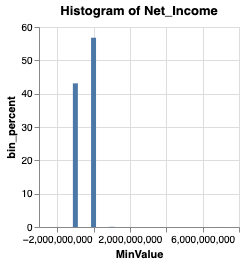

In [74]:
%chart x = MinValue, y = bin_percent, title = "Histogram of Net_Income"


<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.4 TD_OutlierFilterFit</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://docs.teradata.com/search/all?query=TD_OutlierFilterFit&content-lang=en-US'>TD_OutlierFilterFit</a> function calculates the lower_percentile, upper_percentile, count of rows and median for the specified input table columns. The calculated values for each column help the TD_OutlierFilterTransform function detect outliers in the input table.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Some select parameters include</p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>TargetColumns; which takes a list or a range of values/ordinals</li>
    <li>ReplacementValue; delete, null. median, or a value</li>
    <li>OutlierMethod; Percentile, tukey, or carling</li>
    <li>Variable-width, which requires a MinMax table</li>   
    <li>Other outlier identification parameters depending on OutlierMethod</li>
    </ul>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In this case, we will use the Percentile method on our latitude/longitude on columns to delete rows containing outlier values. Additional parameter values define upper and lower percentile values and the percentile calculation method (Discrete).</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'></p>

In [75]:
CREATE VOLATILE TABLE OutlierFitTbl AS(
    SELECT *
        FROM TD_OutlierFilterFit(
            ON Hospital_Revenue_Factors1 AS InputTable
            USING
            TargetColumns('Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable',
                'Medicaid_Charges',
                'Net_Revenue_from_Medicaid',
                'Cost_To_Charge_Ratio',
                'Outpatient_Total_Charges',
                'Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts',
                'Total_Other_Income',
                'Total_Income',
                'Net_Income',
                'Net_Income_from_Service_to_Patients')  
            LowerPercentile(0.02)
            UpperPercentile(0.98)  
            OutlierMethod('Percentile')            
            ReplacementValue('delete')
        ) AS dt
) WITH DATA
ON COMMIT PRESERVE ROWS;

Success: 0 rows affected

In [76]:
SELECT TOP 100 * FROM OutlierFitTbl ; -- run with original table to check the name of hospital of outlier

,TD_OUTLIERMETHOD_OFTFIT,TD_IQRMULTIPLIER_OFTFIT,TD_REMOVETAIL_OFTFIT,TD_REPLACEMENTVALUE_OFTFIT,TD_MINTHRESHOLD_OFTFIT,TD_MAXTHRESHOLD_OFTFIT,TD_ATTRIBUTEVALUE_OFTFIT,TD_COUNTVALUE_OFTFIT,TD_MEDIANVALUE_OFTFIT,TD_LOWERPERCENTILE_OFTFIT,TD_UPPERPERCENTILE_OFTFIT
1,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Outpatient_Total_Charges,5449,1.42918601e+08,4902,2.929572986e+09
2,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable,4101,-1.0219125e+07,-5.3355446e+08,-6832
3,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Net_Income_from_Service_to_Patients,5979,-2.037805e+06,-2.2794088e+08,1.02812107e+08
4,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Total_Other_Income,5751,2.970702e+06,-1.0979426e+07,2.29855717e+08
5,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Medicaid_Charges,4373,5.1660315e+07,483236,1.361081908e+09
6,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Total_Income,5973,1.004401e+06,-8.9316358e+07,1.58894713e+08
7,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts,5740,1.26810109e+08,1.51131e+06,4.832478861e+09
8,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Cost_To_Charge_Ratio,4600,0.28993650000000004,0.074617,1.127645
9,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Net_Revenue_from_Medicaid,4385,9.163034e+06,133553,2.42065955e+08
10,PERCENTILE,1.5,BOTH,DELETE,0.02,0.98,Net_Income,5974,750973,-9.5822419e+07,1.49682077e+08


Success: 0 rows affected

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>4 Scale Transform </b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Many machine learning models, especially those that rely on distance calculations (e.g., K-Means, K-Nearest Neighbors, Support Vector Machines, and Principal Component Analysis), assume that all features contribute equally. If one feature has a much larger scale than others, it can dominate the model’s behavior.

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://docs.teradata.com/r/Enterprise_IntelliFlex_VMware/Database-Analytic-Functions/Feature-Engineering-Transform-Functions/TD_ScaleFit'>TD_ScaleFit</a> outputs a table of statistics to input to TD_ScaleTransform, which scales specified input table columns. TD_ScaleFit accepts input data in dense and sparse format.
    <br>
    <a href = 'https://docs.teradata.com/search/all?query=TD_UnivariateStatistics&content-lang=en-US'>TD_ScaleTransform</a> scales specified input table columns, using TD_ScaleFit output. TD_ScaleTransform accepts input data in dense and sparse format.
</p>

In [77]:
select * from AllStats_pivoted order by 1;

,StatName,'Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable','Medicaid_Charges','Net_Revenue_from_Medicaid','Cost_To_Charge_Ratio','Outpatient_Total_Charges','Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts','Total_Other_Income','Total_Income','Net_Income','Net_Income_from_Service_to_Patients'
1,MAXIMUM,2997982490.00,7968634234.00,3173353585.00,3636.89,22052095387.00,34204267678.00,1794123702.00,7903916479.00,7919569502.00,7864650440.00
2,MEAN,-61300357.08,194253153.77,31727939.08,1.35,466348478.27,682039613.36,22122194.79,9155437.97,7117900.53,-12132348.42
3,MEDIAN,-10219125.00,51660315.00,9163034.00,.29,142918601.00,126810109.00,2970702.00,1004401.00,750973.00,-2037805.00
4,MINIMUM,-5019264385.00,10.00,-14497169.00,.04,21.00,-6670292.00,-296372414.00,-1224029123.00,-1224029123.00,-1625376000.00
5,MODE,-670984347.00,4649134.00,1.00,1.00,255.00,1.00,1.00,-5111626.00,-4883173.00,-15655043.00
6,PERCENTILES(1),-682803631.00,244047.68,37188.04,.07,783.76,255646.95,-30316523.50,-134795532.36,-146386717.45,-389209893.94
7,PERCENTILES(10),-156868664.00,2851717.80,880139.80,.14,3473145.60,9220557.40,36185.00,-22131733.60,-24296555.50,-49277800.40
8,PERCENTILES(25),-48708289.00,11189569.00,2851322.00,.20,25494578.00,27068125.50,643341.00,-3266985.00,-3868518.50,-12487234.00
9,PERCENTILES(5),-290532846.00,1183231.40,403498.20,.10,349442.40,4798208.00,44.50,-45404634.80,-50835593.55,-98813020.40
10,PERCENTILES(50),-10219125.00,51660315.00,9163034.00,.29,142918601.00,126810109.00,2970702.00,1004401.00,750973.00,-2037805.00


In [78]:
--Calculate Scaling parameters
CREATE VOLATILE TABLE income_feature_scaled as (
SELECT * FROM TD_ScaleFit(
    ON Hospital_Revenue_Factors1 AS InputTable
    --OUT TABLE OutputTable(features_scaled)
    USING
        TargetColumns('Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable',
                'Medicaid_Charges',
                'Net_Revenue_from_Medicaid',
                'Cost_To_Charge_Ratio',
                'Outpatient_Total_Charges',
                'Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts',
                'Total_Other_Income',
                'Total_Income',
                'Net_Income',
                'Net_Income_from_Service_to_Patients')
        ScaleMethod('range')
        MissValue('zero')
) as dt)WITH DATA
ON COMMIT PRESERVE ROWS;

Success: 0 rows affected

In [79]:
select * from income_feature_scaled

,TD_STATTYPE_SCLFIT,Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable,Medicaid_Charges,Net_Revenue_from_Medicaid,Cost_To_Charge_Ratio,Outpatient_Total_Charges,Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts,Total_Other_Income,Total_Income,Net_Income,Net_Income_from_Service_to_Patients
1,min,-5.019264385e+09,10,-1.4497169e+07,0.041931,21,-6.670292e+06,-2.96372414e+08,-1.224029123e+09,-1.224029123e+09,-1.625376e+09
2,max,2.99798249e+09,7.968634234e+09,3.173353585e+09,3636.891704,2.2052095387e+10,3.4204267678e+10,1.794123702e+09,7.903916479e+09,7.919569502e+09,7.86465044e+09
3,sum,-2.51392764402e+11,8.49469041448e+11,1.39127012883e+11,6209.2891070000005,2.54113285809e+12,3.914907380697e+12,1.2722474223e+11,5.4685431011e+10,4.2522337785e+10,-7.2539311219e+10
4,count,4101,4373,4385,4600,5449,5740,5751,5973,5974,5979
5,null,1963,1691,1679,1464,615,324,313,91,90,85
6,avg,-6.1300357084125824e+07,1.9425315377269608e+08,3.1727939083922464e+07,1.3498454580434784,4.663484782694072e+08,6.820396133618467e+08,2.2122194788732395e+07,9.155437972710531e+06,7.117900533143623e+06,-1.2132348422645928e+07
7,multiplier,1,1,1,1,1,1,1,1,1,1
8,intercept,0,0,0,0,0,0,0,0,0,0
9,location,-5.019264385e+09,10,-1.4497169e+07,0.041931,21,-6.670292e+06,-2.96372414e+08,-1.224029123e+09,-1.224029123e+09,-1.625376e+09
10,scale,8.017246875e+09,7.968634224e+09,3.187850754e+09,3636.849773,2.2052095366e+10,3.421093797e+10,2.090496116e+09,9.127945602e+09,9.143598625e+09,9.49002644e+09


<p style = 'font-size:18px;font-family:Arial;color:#00233C'> <b> 5. TD_ColumnTransformer  </b> </p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://docs.teradata.com/r/Enterprise_IntelliFlex_VMware/Database-Analytic-Functions/Feature-Engineering-Transform-Functions/TD_ColumnTransformer'>TD_ColumnTransformer</a>The function transforms the entire dataset in a single operation. You only need
to provide the FIT tables to the function, and the function runs all transformations that you require in a
single operation. Running all the it table transformations together in one-go gives approx. 30% performance improvement over running each transformation sequentially.</p>

In [80]:
CREATE VOLATILE TABLE hospital_finance_transformed  AS (
    SELECT  Hospital_Name,
            County,
            Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable,
            Medicaid_Charges,
            Net_Revenue_from_Medicaid,
            Cost_To_Charge_Ratio,
            Outpatient_Total_Charges,
            Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts,
            Total_Other_Income,
            Total_Income,
            Net_Income,
            Net_Income_from_Service_to_Patients

        FROM TD_ColumnTransformer(
        ON Hospital_Revenue_Factors1 AS InputTable PARTITION BY ANY 
            
        ON ImputFitTbl AS SimpleImputeFitTable DIMENSION 
        ON OutlierFitTbl AS OutlierFilterFitTable DIMENSION
        ON income_feature_scaled AS ScaleFitTable DIMENSION
            
            
    ) AS dt
)with data ON COMMIT PRESERVE ROWS;

Success: 0 rows affected

In [81]:
select * from hospital_finance_transformed

,Hospital_Name,County,Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable,Medicaid_Charges,Net_Revenue_from_Medicaid,Cost_To_Charge_Ratio,Outpatient_Total_Charges,Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts,Total_Other_Income,Total_Income,Net_Income,Net_Income_from_Service_to_Patients
1,PAUL B. HALL REGIONAL MEDICAL CENTER,JOHNSON,0.6227903540765046,0.003351698829337558,0.004897121981137766,8.987448489805961e-06,0.0018851405868711587,0.001992325292564903,0.14280045952498674,0.1344020920469986,0.13417200604647056,0.17133887669126452
2,MURRAY CALLOWAY COUNTY HOSPITAL,CALLOWAY,0.6203232136343563,0.010438578890906313,0.009203753645990166,4.843257516647499e-05,0.014761530938320357,0.010822387662234565,0.14178324691993832,0.13411971339221834,0.133890112439182,0.17129134700282247
3,NATCHEZ REGIONAL MEDICAL CENTER,ADAMS,0.6249101658105046,0.015916195352273958,0.00967588396705726,1.813327580633065e-05,0.013248304895798807,0.015200877814458825,0.1429760355507879,0.13442862539968936,0.13419849561692676,0.17132572119577782
4,WALDO COUNTY GENERAL HOSPITAL,WALDO,0.6259183387065151,0.004283075874810037,0.011866688850641217,0.00012893521296404673,0.007059864807225322,0.002987757193025012,0.1494059015989102,0.1350350231852751,0.13480385530374261,0.17049258927038352
5,MARSHFIELD MEDICAL CENTER-EAU CLAIRE,,0.6247837116778321,0.002358945770579518,0.00904401749794087,0.00011259194785552667,0.003841580294025652,0.0029532476159699985,0.14217601349516212,0.13372291041398782,0.133477378552364,0.1708231635864652
6,TJ HEALTH COLUMBIA,ADAIR,0.625494923779555,0.002659620005667862,0.006790974129775713,9.995793686581841e-05,0.0018616016445899494,0.001077555927648832,0.14361334120747057,0.1345845823983472,0.13435418563115242,0.17133533992556504
7,HIGHLAND COMMUNITY HOSPITAL,PEARL RIVER,0.6225092770390709,0.0033736921841676943,0.008003807570973883,7.039801366026895e-05,0.005199936473011895,0.0035481470021793736,0.14281785300384647,0.1330592810208993,0.1328314779346518,0.17004346755012834
8,COOLEY DICKINSON HOSPITAL,HAMPSHIRE,0.6247837116778321,0.011228123224745973,0.011862467824928795,7.584036108603929e-05,0.021793888699619547,0.012725219705515137,0.14359587310517635,0.13509774343197276,0.1348664681789879,0.1718327698357814
9,AMERICAN HEALTHCARE SYSTEMS,RANDOLPH,0.6202355766922795,0.0007843114421259951,0.005088457161818561,3.267140723879441e-05,0.004749667787193081,0.004771106367885417,0.13858499749539835,0.1327921321895713,0.13256480393680886,0.17071893964080462
10,WALTHALL COUNTY GENERAL HOSPITAL,WALTHALL,0.6254456320456017,0.0005067820766370767,0.005208730358271973,0.00011509136371468154,0.001004547170340765,0.0006363268677137647,0.14203447819273538,0.1340784171338448,0.13384888687630905,0.17119628425397726


<p style = 'font-size:18px;font-family:Arial;color:#00233C'> <b> 6. Identify Correlations  </b> </p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://docs.teradata.com/r/Enterprise_IntelliFlex_VMware/Database-Analytic-Functions/Feature-Engineering-Transform-Functions/TD_ColumnTransformer'>CORR</a> Returns the Sample Pearson product moment correlation coefficient of its arguments for all non-null data point pairs.</p>

In [82]:
SELECT 
    CORR(Net_Income, Total_Income) AS Corr_Total_Income,
    CORR(Net_Income, Net_Income_from_Service_to_Patients) AS Corr_Service_Income,
    CORR(Net_Income, Cost_To_Charge_Ratio) AS Corr_CCR,
    CORR(Net_Income, Net_Revenue_from_Medicaid) AS Corr_Medicaid_Revenue,
    CORR(Net_Income, Medicaid_Charges) AS Corr_Medicaid_Charges,
    CORR(Net_Income, Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable) AS Corr_Uncollectible_Allowances,
    CORR(Net_Income, Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts) AS Corr_Less_Contractual_Allowance,
    CORR(Net_Income, Outpatient_Total_Charges) AS Corr_outpatient_charge
from hospital_finance_transformed

,Corr_Total_Income,Corr_Service_Income,Corr_CCR,Corr_Medicaid_Revenue,Corr_Medicaid_Charges,Corr_Uncollectible_Allowances,Corr_Less_Contractual_Allowance,Corr_outpatient_charge
1,0.9409669435378463,0.690830239712589,-0.14776519103458832,0.09088347015698248,0.11696951356647764,-0.12030765835462655,0.2090627798735063,0.2471589895176987


✔ Revenue is the biggest driver of profitability, especially from patient services. <br>
✔ Outpatient revenue has a weak impact, suggesting inpatient services may be more profitable.<br>
✔ High costs, uncollectible revenue, and patient discounts slightly reduce profitability, but not significantly.<br>
✔ Medicaid revenue does not strongly influence profitability, suggesting hospitals relying on Medicaid may not experience major financial gains.

Hospital profitability is primarily driven by total income and patient service revenue, while high costs, uncollectible debts, and patient discounts slightly reduce profitability, and Medicaid revenue has minimal impact.

In [83]:
create volatile table top10_income as (
select top 10* from Hospital_Revenue_Factors
    where Net_Income is not null order by Net_Income DESC) with data ON COMMIT PRESERVE ROWS;

Success: 0 rows affected

In [84]:
select * from top10_income 
 order by Net_Income

,Hospital_Name,State_Code,County,City,Total_Income,Net_Income,Net_Income_from_Service_to_Patients,Total_Other_Income,Total_Other_Expenses,Wage_Related_Costs_RHC_FQHC,Notes_Receivable,Cost_To_Charge_Ratio,Net_Revenue_from_Medicaid,Medicaid_Charges,Net_Revenue_from_Stand_Alone_CHIP,Stand_Alone_CHIP_Charges,Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable,Hospital_Total_Days_Title_V_For_Adults_Peds,Unsecured_Loans,Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts,Outpatient_Total_Charges
1,MEDICAL CITY DALLAS,TX,DALLAS,DALLAS,660991062.00,660991036.00,658112972.00,2878090.00,26.00,,,.082709,197503613.00,1551733325.00,221781.00,4535546.00,-94811928.00,,-4343402834.00,8450548906.00,2387726860.00
2,STANFORD HEALTH CARE,CA,SANTA CLARA,STANFORD,792338880.00,808452368.00,248312977.00,544025903.00,-16113488.00,23542404.00,,.140251,446493123.00,4842139546.00,,,-1787106292.00,,,27041721070.00,17346456020.00
3,UT MD ANDERSON CANCER CENTER,TX,HARRIS,HOUSTON,923884226.00,930983722.00,-39220060.00,963104286.00,-7099496.00,,,,,,,,,,,6031195566.00,7787569005.00
4,BANNER BAYWOOD MEDICAL CENTER,AZ,MARICOPA,MESA,1098298652.00,1098298652.00,1098298652.00,,,,,.183744,17919538.00,181420967.00,,,-46692195.00,,,,640622916.00
5,EASTERN MAINE MEDICAL CENTER,ME,PENOBSCOT,BANGOR,1100474442.00,1098937334.00,986045197.00,114429245.00,1537108.00,,,.381278,100942727.00,355353084.00,,,-35329534.00,,,1615203461.00,1084915267.00
6,MAYO CLINIC HOSPITAL ROCHESTER,MN,OLMSTED,ROCHESTER,1134895178.00,1139428663.00,1096006331.00,38888847.00,-4533485.00,,,.333602,182054435.00,725031112.00,,,-571005738.00,,,3867288387.00,3937597724.00
7,NYU LANGONE HOSPITALS,NY,NEW YORK,NEW YORK,649943382.00,1218595000.00,-567907443.00,1217850825.00,-568651618.00,,,.155956,891097486.00,7968634234.00,,,,,,34204267678.00,22052095387.00
8,BANNER ESTRELLA MEDICAL CENTER,AZ,,PHOENIX,1454594643.00,1454594643.00,1454594643.00,,,,,.191345,63751575.00,602221726.00,,,,,,,810700731.00
9,UH - UNIVERSITY HOSPITAL,NJ,ESSEX,NEWARK,2584008657.00,2584008657.00,2329474773.00,254533884.00,,,,.234578,221995051.00,1427257220.00,,,-654532218.00,,83510317.00,,1135769234.00
10,ST. LUKES HOSPITAL,PA,LEHIGH,BETHLEHEM,7903916479.00,7919569502.00,7864650440.00,39266039.00,-15653023.00,,,.098546,110057362.00,1617652516.00,,,50918961.00,,,,4249007746.00


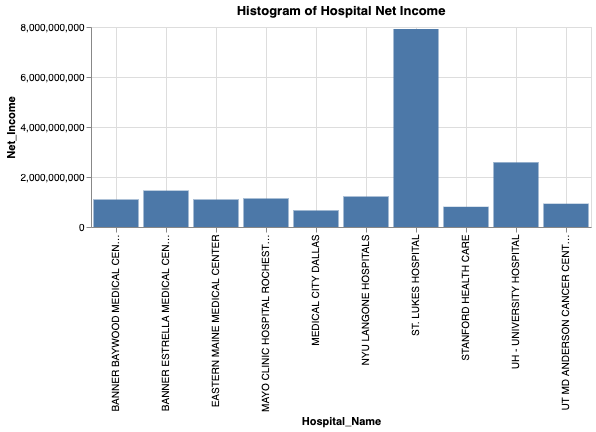

In [85]:
%chart x = Hospital_Name, y = Net_Income, title = "Histogram of Hospital Net Income", width = 500


In [86]:
SELECT 
    CORR(Net_Income, Total_Income) AS Corr_Total_Income,
    CORR(Net_Income, Net_Income_from_Service_to_Patients) AS Corr_Service_Income,
    CORR(Net_Income, Cost_To_Charge_Ratio) AS Corr_CCR,
    CORR(Net_Income, Net_Revenue_from_Medicaid) AS Corr_Medicaid_Revenue,
    CORR(Net_Income, Medicaid_Charges) AS Corr_Medicaid_Charges,
    CORR(Net_Income, Less_Allowances_for_Uncollectible_Notes_Accounts_Receivable) AS Corr_Uncollectible_Allowances,
    CORR(Net_Income, Less_Contractual_Allowance_and_Discounts_on_Patients_Accounts) AS Corr_Less_Contractual_Allowance,
    CORR(Net_Income, Outpatient_Total_Charges) AS Corr_outpatient_charge 
from top10_income;

,Corr_Total_Income,Corr_Service_Income,Corr_CCR,Corr_Medicaid_Revenue,Corr_Medicaid_Charges,Corr_Uncollectible_Allowances,Corr_Less_Contractual_Allowance,Corr_outpatient_charge
1,0.9967492934567191,0.9703087923584812,-0.31158005259375815,-0.20272750051574703,-0.10671592852441121,0.32623763087431346,0.11265698396792084,-0.15043732474975988


Highly Positive Correlation:

Total Income (0.9967) and Net Income from Service to Patients (0.9703) have a very strong positive correlation with Net Income. This suggests that as Net Income increases, these variables increase almost proportionally.

Moderate Positive Correlation:

Uncollectible Allowances (0.3262) and Less Contractual Allowance (0.1127) show a weak to moderate positive correlation with Net Income, meaning they might slightly increase as Net Income rises.

Weak or Negative Correlation:

Cost to Charge Ratio (-0.3116), Medicaid Revenue (-0.2027), Medicaid Charges (-0.1067), and Outpatient Total Charges (-0.1504) have a weak to moderate negative correlation with Net Income. This implies that as Net Income increases, these factors tend to decrease slightly, though the relationship is not very strong.